Este proyecto consiste en realizar un análisis exploratorio a una base de datos que cuenta la librería Seaborn sobre pinguinos y sus distintas características

Importamos librerias a ocupar en el proyecto

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf



Cargamos los datos

In [65]:
ssl._create_default_https_context = ssl._create_unverified_context
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


1. Realizamos la primera estapa que es conocer y validar nuestros datos

Identificamos el tipo de dato que posee cada variable

In [66]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Contamos cuantas variables hay por cada tipo de dato

In [67]:
df.dtypes.value_counts()

float64    4
object     3
dtype: int64

Vemos cuantas filas y columnas tiene el Dataframe

In [68]:
df.shape

(344, 7)

Vemos si existen columnas con valores nulos 

In [69]:
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

Vemos cuantos valores nulos hay por columnas

In [70]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Sumamos el total de valores nulos 

In [71]:
df.isnull().sum().sum()

19

Graficamos la proporcion de valores nulos por cada variable

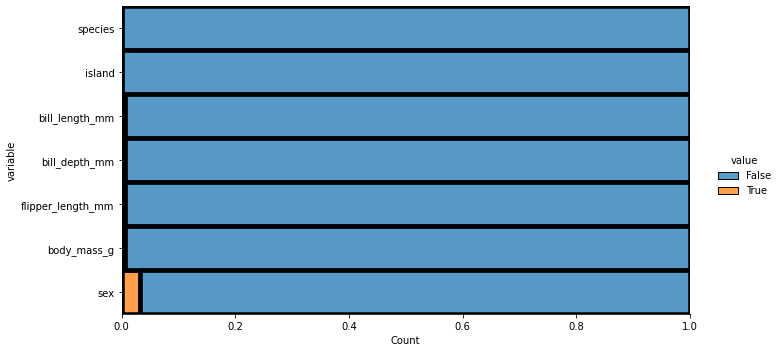

In [72]:
df.isnull().melt().pipe(
    lambda df:(
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2
        )
    )
)

Ahora lo vemos por cada pinguino, para ver si quizás es un solo pinguino el que tiene mayores valores nulos

<AxesSubplot:>

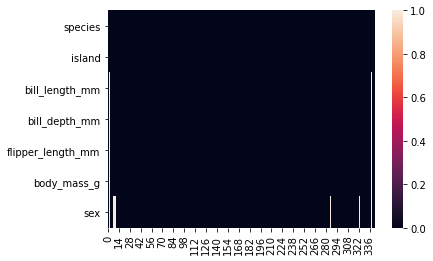

In [73]:
df.isnull().transpose().pipe(
    lambda df:(
        sns.heatmap(
            data=df
        )
    )
)

Como son pocos los valores nulos en este caso lo mejor es eliminar esos valores

In [74]:
df_limpio = df.dropna()
df_limpio.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

2. Exploramos nuestras variables categóricas

Acá verenos los estadiscos de todo el conjunto de datos

In [75]:
df_limpio.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


Si queremos ver solo los estadisticos de las variables numéricas

In [76]:
df_limpio.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Si queremos ver los estadísticos solo de las variables categóricas

In [77]:
df_limpio.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


Ahora podemos graficar el conteo de las especies mediante dos maneras

<AxesSubplot:>

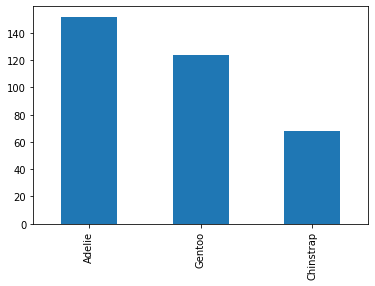

In [78]:
df.species.value_counts().plot(kind='bar')

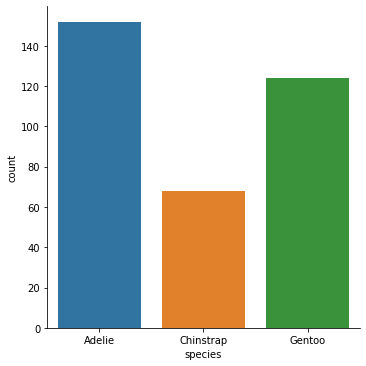

In [79]:
sns.catplot(data=df,x='species',kind='count')

Si queremos ver la proporción de forma gráfica

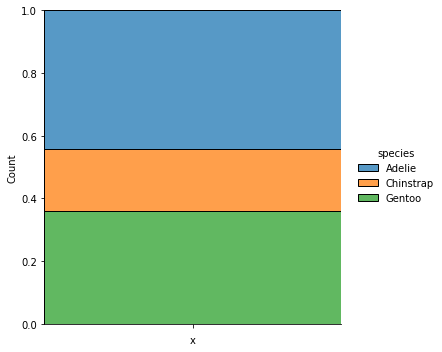

In [80]:
df['x'] = ''  
sns.displot(data=df, x='x', hue='species', multiple='fill')
plt.show()

3. Medidas de Tendencia Central

La media

In [81]:
df.bill_depth_mm.mean()

17.151169590643278

In [82]:
df.mean()

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

La mediana

In [83]:
df.median()

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

La moda

In [84]:
df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,x
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male,


In [85]:
df.describe(include=object)

,species,island,sex,x
count,344,344,333,344
unique,3,3,2,1
top,Adelie,Biscoe,Male,
freq,152,168,168,344


4. Medidas de disperción y distribuciones

El máximo valor de las variables numericas

In [86]:
maximo = df.max(numeric_only=True)
print(maximo)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64


El minimo valor de las varianbles numericas

In [87]:
minimo = df.min(numeric_only=True)
print(minimo)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64


El rango

In [88]:
rango = maximo-minimo
print(rango)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64


La desviación estandar

In [89]:
desv = df.std()
print(desv)

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64


El rango intercuartilico

In [90]:
q75 = df.quantile(0.75)
q25 = df.quantile(0.25)
rango_int = q75-q25
print(rango_int)

bill_length_mm          9.275
bill_depth_mm           3.100
flipper_length_mm      23.000
body_mass_g          1200.000
dtype: float64


In [91]:
df.quantile(q=[0.75,0.50,0.25]).transpose()

,0.75,0.50,0.25
bill_length_mm,48.5,44.45,39.225
bill_depth_mm,18.7,17.30,15.600
flipper_length_mm,213.0,197.00,190.000
body_mass_g,4750.0,4050.00,3550.000


5. Distribución de las variables

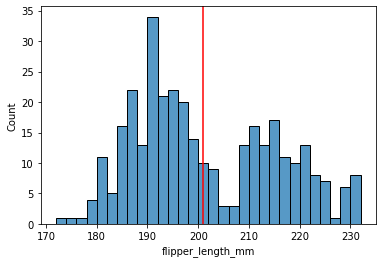

In [92]:
sns.histplot(data=df_limpio,
             x='flipper_length_mm',
             binwidth=2)

plt.axvline(x=df.flipper_length_mm.mean(),color='red')

Diagrama de caja / boxplot

<AxesSubplot:xlabel='flipper_length_mm'>

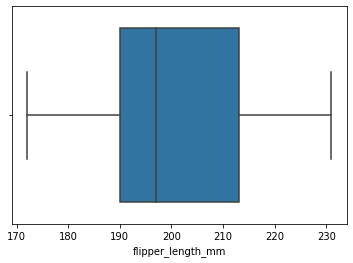

In [93]:
sns.boxplot(data=df,
            x='flipper_length_mm')

6. Análisis Bivariado

Gráfico de puntos

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

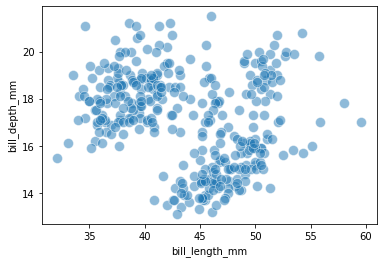

In [94]:
sns.scatterplot(data=df,
                x='bill_length_mm',
                y='bill_depth_mm',
                alpha = 1/2,
                s=100)

Histograma 2D

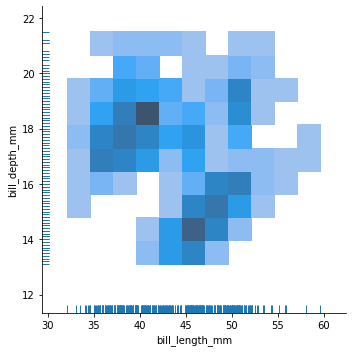

In [95]:
sns.displot(data=df,
            x='bill_length_mm',
            y='bill_depth_mm',
            rug=True)

Grafico de densidad

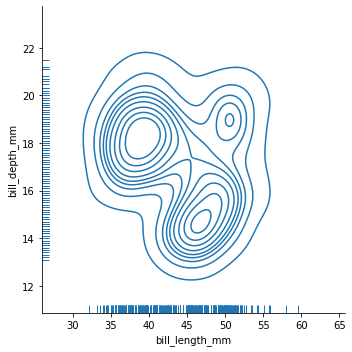

In [96]:
sns.displot(data=df,
            x='bill_length_mm',
            y='bill_depth_mm',
            rug=True,
            kind='kde')

Los tres graficos son distintas maneras de visualizar la misma información

Y por último podemos visualizar varios gráficos en la misma visual

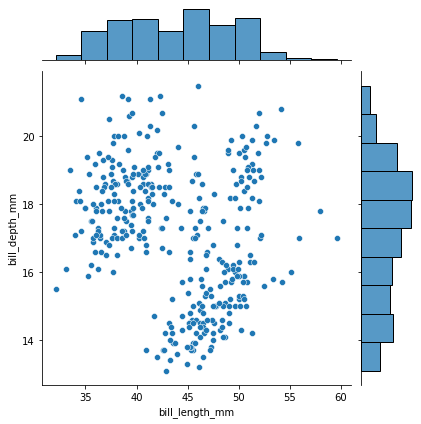

In [97]:
sns.jointplot(data=df,
            x='bill_length_mm',
            y='bill_depth_mm')

7. Relación entre una variable Categórica y Numérica

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

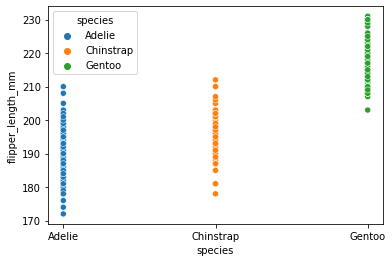

In [98]:
sns.scatterplot(data=df,
            x='species',
            y='flipper_length_mm',
            hue='species')

Agregandole un poco de ruido para poder visualizarlo de mejor manera

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

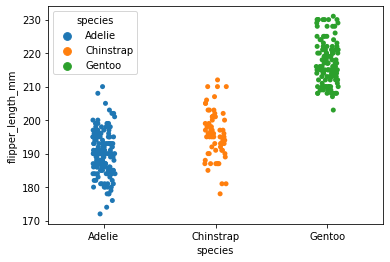

In [99]:
sns.stripplot(data=df,
            x='species',
            y='flipper_length_mm',
            hue='species')

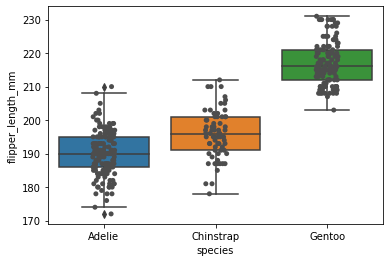

In [100]:
sns.boxplot(data=df,
            x='species',
            y='flipper_length_mm')

ax=sns.stripplot(data=df,
            x='species',
            y='flipper_length_mm',
            color=' .3')

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

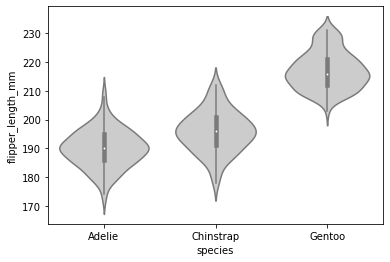

In [101]:
sns.violinplot(data=df,
            x='species',
            y='flipper_length_mm',
            color=' .8')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

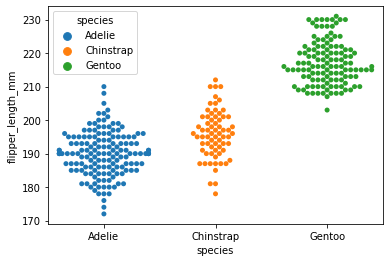

In [102]:
sns.swarmplot(data=df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

8. Correlación

In [103]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

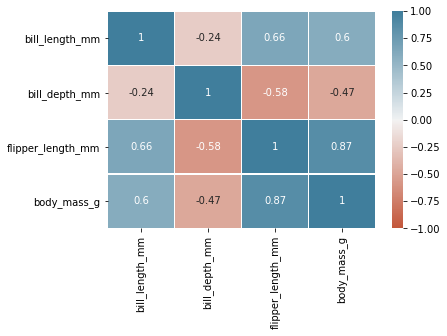

In [104]:
sns.heatmap(data=df.corr(),
            cmap=sns.diverging_palette(20,230,as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            annot=True)

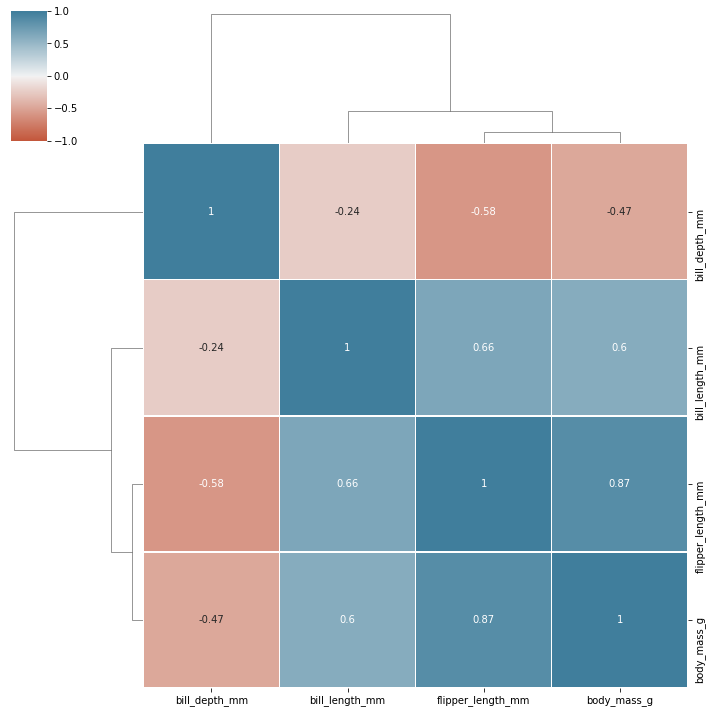

In [105]:
sns.clustermap(data=df.corr(),
            cmap=sns.diverging_palette(20,230,as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            annot=True)

Regresión Lineal

Primero veremos como funciona, para esto crearemos 2 variables que sigan mas o menos una tendencia lineal y graficaremos

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

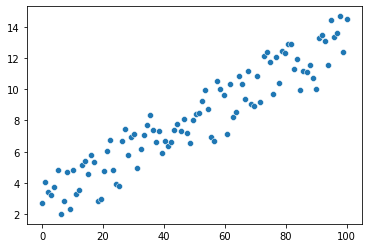

In [106]:
x_1 = np.linspace(0,100,100)
y_1 = 0.1 * x_1 + 3 +np.random.uniform(-2,2,size=x_1.size)
sns.scatterplot(x_1,y_1)

Ahora analizaremos los datos al aplicar una regresión lineal a las variables

In [107]:
res = scipy.stats.linregress(x=x_1, y=y_1)
print(res)

LinregressResult(slope=0.10540484655961212, intercept=2.9191010935509434, rvalue=0.9420346266010046, pvalue=2.821355520076932e-48, stderr=0.0037922196080892663, intercept_stderr=0.21949609346053012)


El Slope es uno de los datos más importantes, ya que nos indica el efecto que tiene la correlación, en caso de que exista o en otras palabras que tanto cambia la variable y. Intercept nos indica donde corta en el eje Y. Rvalue nos inidica cuantos datos estamos capturando con la regresión lineal. Y el Pvalue nos indica si es significativa esta regresión.

Ahora lo veremos con nuestros datos

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

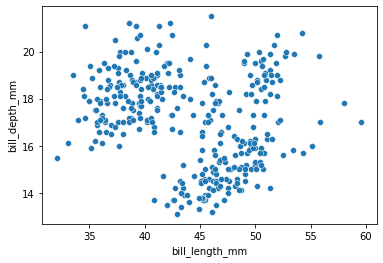

In [108]:
sns.scatterplot(data=df_limpio,
                x='bill_length_mm',
                y='bill_depth_mm')

In [109]:
res_penguins =scipy.stats.linregress(x=df_limpio.bill_length_mm, y=df_limpio.bill_depth_mm)
print(res_penguins)

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)


Podemos darnos cuenta que el Slope es negativo es decir la regresión tiene pendiente negativa, corta en 20 en el eje Y y el modelo solo capturaría un 23% de los datos.

Ahora lo veremos de forma gráfica, para esto debemos contruir la ecuación de la recta

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)


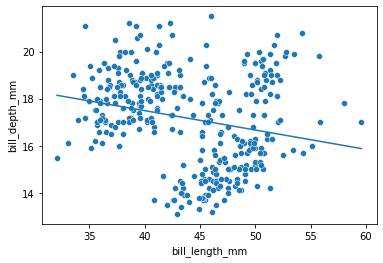

In [110]:
sns.scatterplot(data=df_limpio,
                x='bill_length_mm',
                y='bill_depth_mm')

res_penguins =scipy.stats.linregress(x=df_limpio.bill_length_mm, y=df_limpio.bill_depth_mm)
print(res_penguins)

fx_1 = np.array([df.bill_length_mm.min(),df.bill_length_mm.max()]) #Generamos los valores en x
fy_1 = res_penguins.intercept + res_penguins.slope * fx_1 # y = n + mx
plt.plot(fx_1,fy_1)

Existe otra forma mas sencilla con sns, pero sin tanto detalle a nivel de números, pero nos incluye un intervalo de confianza

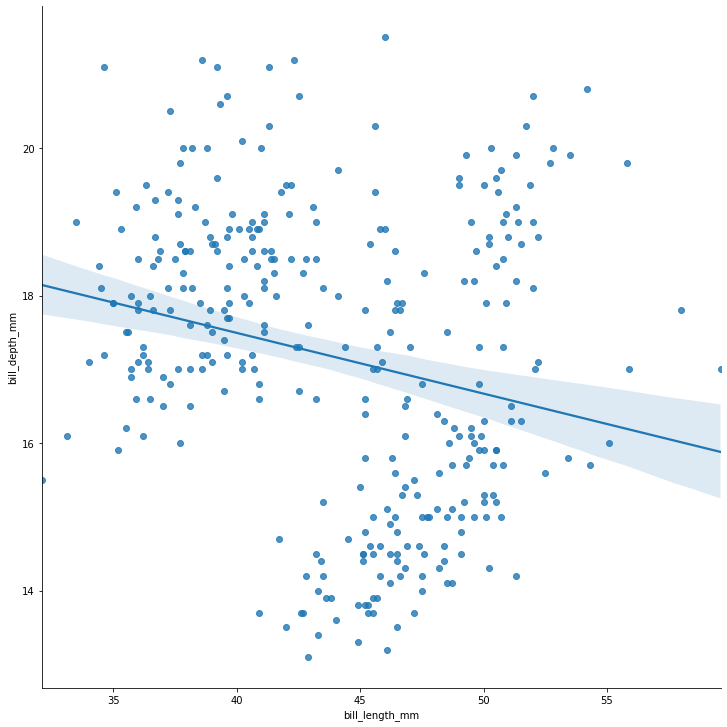

In [111]:
sns.lmplot(data=df_limpio,
           x='bill_length_mm',
           y='bill_depth_mm',
           height=10)

Por ultimo para concluir esto nos arroja que a mayor longitud de ala menos profundidad de pico, acá nos debemos preguntar si esto nos hace sentido y cuestionarnos los resultados

Por ejemplo haciendo alusión a la paradoja de Simpsons, fenomeno en el cual es posible concluir 2 cosas totalmente opuestas a partir de los mismos datos , dependeiendo de como se clasifiquen los datos. Acá incluiremos la variable especies y veremos que nos da una regresión completamente distinta (Positiva), pero que nos hace mucho mas sentido.

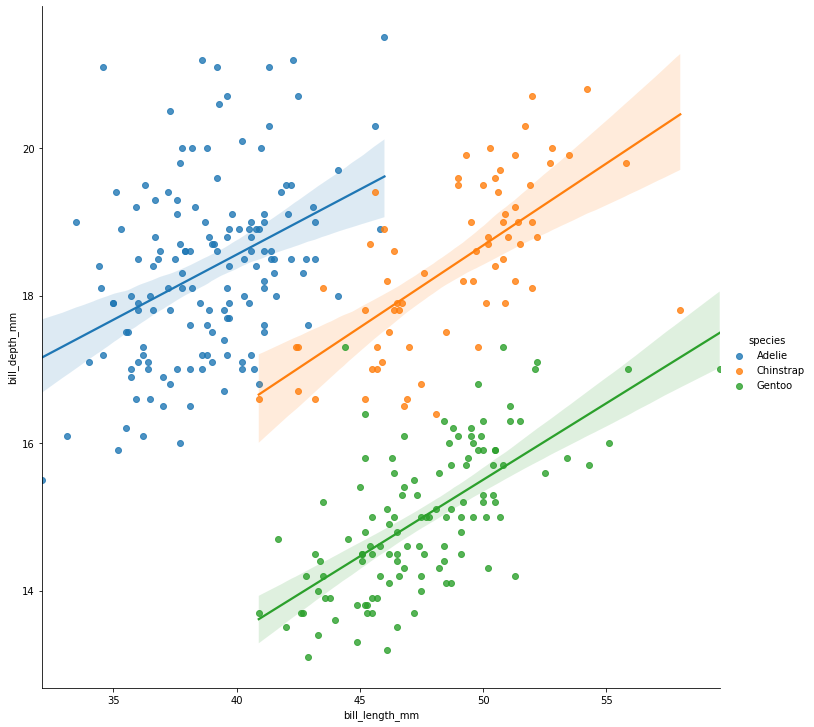

In [112]:
sns.lmplot(data=df_limpio,
           x='bill_length_mm',
           y='bill_depth_mm',
           height=10,
           hue='species')

Regresión Multiple

Consiste en incorporar distintas variables. Haremos un ejemplo, donde supondremos que se nos olvidó la bascula para pesar a los pinguinos, cual sería la mejor forma de capturar ese dato?

Opción 1

Le estamos diciendo al modelo que queremos encontrar la asociación entre cuanto pesa el pinguino y la longitud de su pico.

In [116]:
model_1 = smf.ols(formula='body_mass_g ~ bill_length_mm',
                  data=df_limpio).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.54e-32
Time:                        17:05:31   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De estos valores nos interesa abajo donde sale la variable en cuestion el coeficiente (la pendiente) y el R cuadrado para ver que tantos datos captura el modelo (0.347 es muy bajo) 

Opción 2: sumamos otra variable

In [117]:
model_2 = smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
                  data=df_limpio).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           7.04e-46
Time:                        17:07:30   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al sumar otra variable vemos que una afecta de manera positiva y otra negativa. Sin embargo el R cuadrado sube 0.467

Opción 3: Sumamos otra variable

In [118]:
model_3 = smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
                  data=df_limpio).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          9.26e-103
Time:                        17:08:39   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Al sumar una 3ra variable vemos que el R cuadrado es aún mayor, capturando mayor cantidad de datos el modelo. (0.764)

Opción 4: Sumamos otra variable (En este caso categórica)

In [119]:
model_4 = smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
                  data=df_limpio).fit()

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          6.28e-122
Time:                        17:09:56   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.Male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ahora vemos que nuestro R cuadrado ya esta alcanzando sobre un 0.8

Opción 5: Probamos con un modelo más simple, 2 variables

In [120]:
model_5 = smf.ols(formula='body_mass_g ~ flipper_length_mm',
                  data=df_limpio).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          3.13e-105
Time:                        17:11:01   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Acá vemos que al incluir solo 2 variables se ajusta bastante el modelo siendo mucho mas simple, alcanzando un R cuadrado de 0.76. Por esto es importante ver que tanto se correlacionan las variables para ir sumandolas a nuestros análisis y que no resten, si no al contrario sumen.